# 聚类算法用于降维

## 矢量量化 (Vector Quantization, VQ)
矢量量化是一种数据压缩技术，它将一个 $d$ 维空间中的矢量 $x$ 映射到一个来自有限集合 $C$ 的“码字”(codeword)。这个集合 $C$ 被称为“码本”(Codebook)。

一个矢量量化器 $Q$ 的定义如下：

$$Q: \mathbf{R}^d \to C$$

其中码本 $C = \{c_1, c_2, \dots, c_K\}$，包含了 $K$ 个码字，$c_k \in \mathbb{R}^d$。

## K-均值与矢量量化的关联

**码本生成**： 

将需要量化的数据集 $X$作为训练数据，运行 K-均值算法。算法收敛后得到的 $K$ 个簇质心 $\{\mu_1, \mu_2, \dots, \mu_K\}$ 就构成了矢量量化的码本 $C$。
  
   $$ C = \{\mu_1, \mu_2, \dots, \mu_K\}$$


**最小化量化误差**：

 K-均值算法的目标函数
 $$\arg\min_S \sum_{k=1}^{K} \sum_{x \in S_k} \|x - \mu_k\|^2$$
 本质上是在最小化所有训练样本与它们各自的码字（即簇质心）之间的总平方误差。这与矢量量化的目标——最小化平均量化失真——是完全一致的。


因此，将 K-均值算法应用于一个代表性的数据集上，可以为矢量量化生成一个局部最优的码本，使其在量化该数据集或与之同分布的数据时，平均失真最小。这个过程在图像颜色量化、语音编码和特征压缩等领域有广泛应用。





## 代码

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin  # 对两个序列的点进行距离匹配
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle # 打乱有序的序列

In [3]:
china = load_sample_image('china.jpg')
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [4]:
china.dtype # 典型图片类型

dtype('uint8')

In [5]:
china.shape
# 长度 * 宽度 * 像素（三个数决定的颜色）

(427, 640, 3)

In [6]:
china[0][0]
# 决定第一个颜色

array([174, 201, 231], dtype=uint8)

In [7]:
# 探索图片一共包含多少颜色
newimage = china.reshape((427 * 640), 3)

In [8]:
newimage.shape

(273280, 3)

In [9]:
pd.DataFrame(newimage).drop_duplicates().shape
# 有9w多种不同的颜色

(96615, 3)

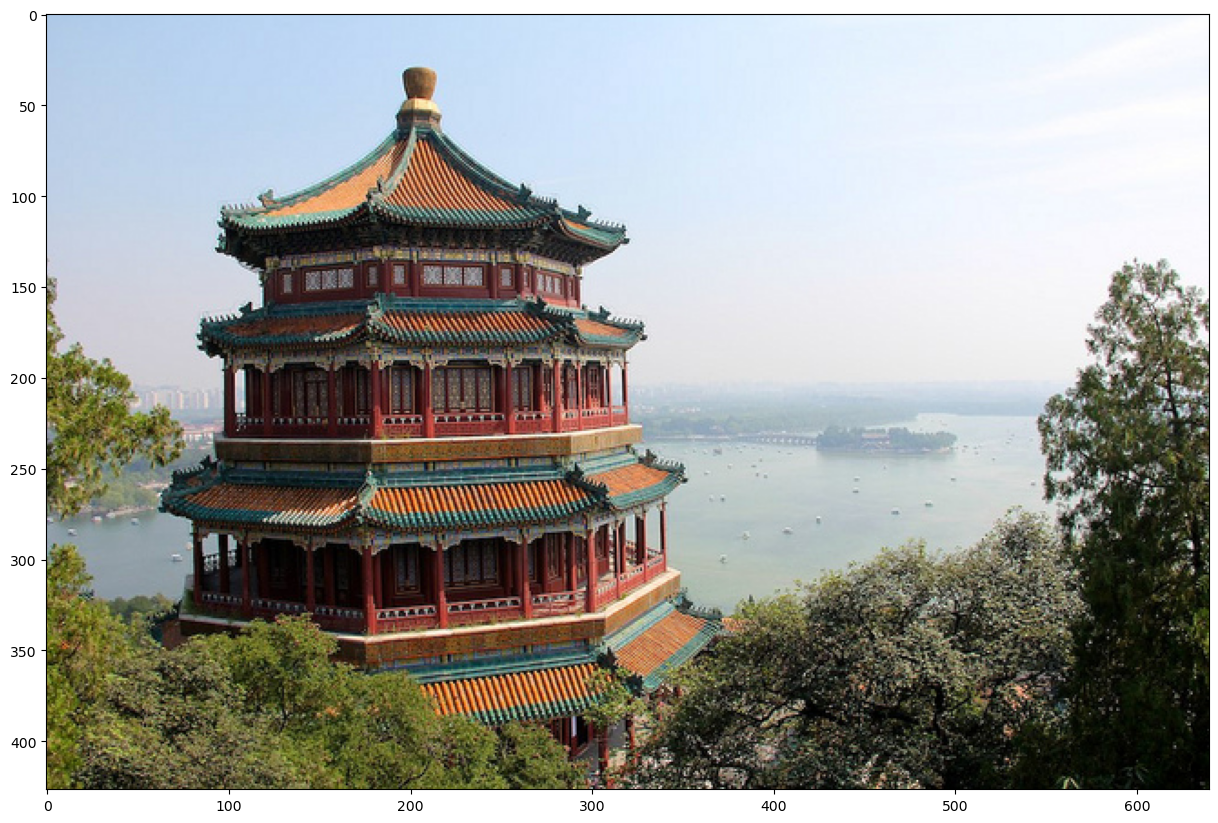

In [10]:
# 图像可视化
plt.figure(figsize=(15, 15))
plt.imshow(china)

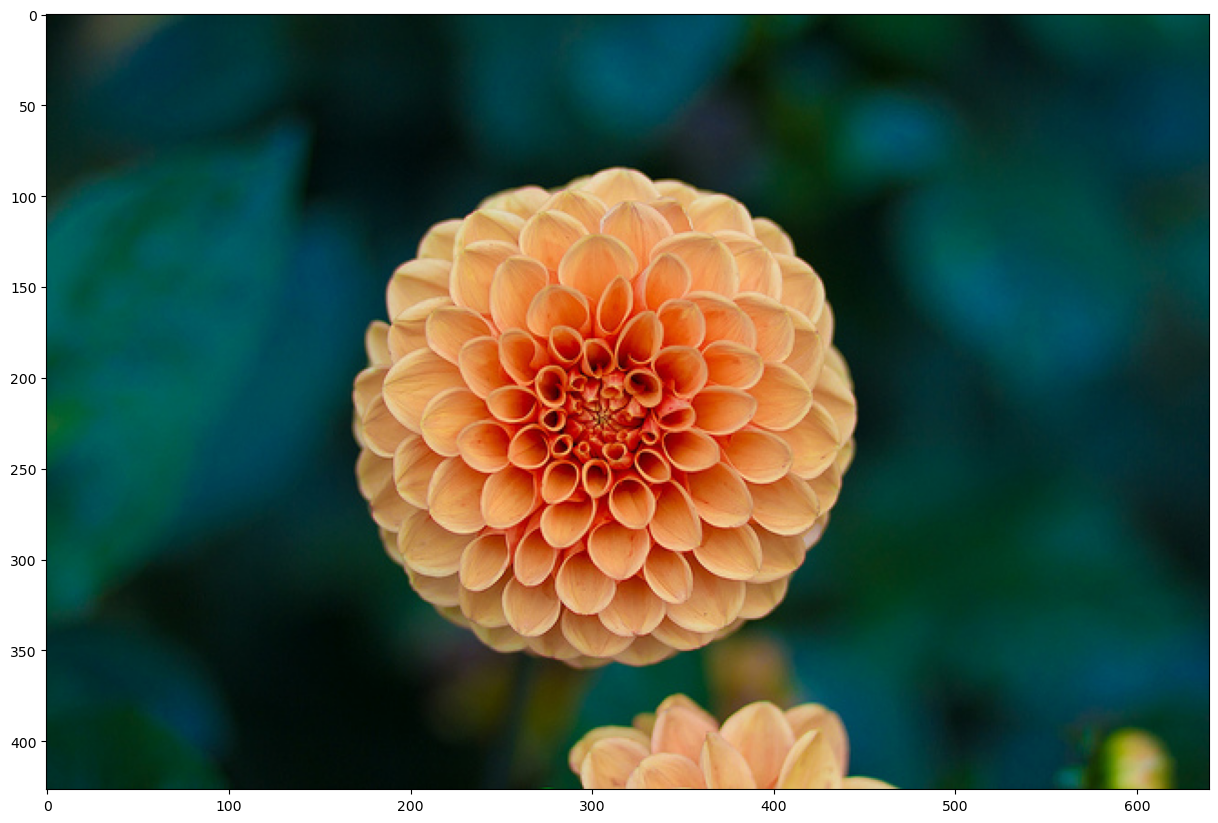

In [11]:
# 查看模块中的另一个图像
flower = load_sample_image('flower.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(flower)

### 数据预处理

In [12]:
# 希望使用KMEAS将9w中颜色压缩成64类，然后使用64个簇的质心来替换全部的9w种颜色
# 要将数据转换为kmesns可以处理的类型,kmeans不接受三维数组作为特征矩阵

n_clusters = 64

# 作归一化处理
# plt.imshow在浮点数上表现优秀
china = np.array(china, dtype=np.float32) / china.max()
w, h, d = origianl_shape = tuple(china.shape)
w, h, d


(427, 640, 3)

In [13]:
china

array([[[0.68235296, 0.7882353 , 0.90588236],
        [0.68235296, 0.7882353 , 0.90588236],
        [0.68235296, 0.7882353 , 0.90588236],
        ...,
        [0.98039216, 0.9843137 , 1.        ],
        [0.98039216, 0.9843137 , 1.        ],
        [0.98039216, 0.9843137 , 1.        ]],

       [[0.6745098 , 0.78039217, 0.8980392 ],
        [0.6784314 , 0.78431374, 0.9019608 ],
        [0.6784314 , 0.78431374, 0.9019608 ],
        ...,
        [0.9843137 , 0.9882353 , 1.        ],
        [0.9843137 , 0.9882353 , 1.        ],
        [0.9843137 , 0.9882353 , 1.        ]],

       [[0.68235296, 0.7882353 , 0.90588236],
        [0.68235296, 0.7882353 , 0.90588236],
        [0.68235296, 0.7882353 , 0.90588236],
        ...,
        [0.9882353 , 0.99215686, 1.        ],
        [0.9882353 , 0.99215686, 1.        ],
        [0.9882353 , 0.99215686, 1.        ]],

       ...,

       [[0.34509805, 0.3137255 , 0.02745098],
        [0.5764706 , 0.5411765 , 0.27058825],
        [0.47843137, 0

In [14]:
assert d == 3
# assert相当于raise error if not，表示“不为True就报错”
# 意思d不是3就报错


In [15]:
d_ = 5
assert d_ == 3, False

AssertionError: False

In [16]:
image_array = np.reshape(china, (w * h, d))
image_array.shape

(273280, 3)

### Kmeans进行矢量量化

In [ ]:
# 首先，馅使用1000个数据来找出质心
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_.shape

(64, 3)

In [23]:
# 按照已存在质心对所有数据进行聚类
labels = kmeans.predict(image_array)
labels, labels.shape

(array([12, 12, 12, ..., 31,  3,  3]), (273280,))

In [19]:
# 使用质心来替换所有样本
image_kmeans = image_array.copy()
for i in range(w * h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [20]:
image_kmeans

array([[0.73524386, 0.8202112 , 0.9192559 ],
       [0.73524386, 0.8202112 , 0.9192559 ],
       [0.73524386, 0.8202112 , 0.9192559 ],
       ...,
       [0.14257699, 0.15350136, 0.12969187],
       [0.06690431, 0.08068925, 0.05288175],
       [0.06690431, 0.08068925, 0.05288175]], dtype=float32)

In [ ]:
pd.DataFrame(image_kmeans).drop_duplicates().shape
# 说明image_kmeas只剩下64中不同的颜色

(64, 3)

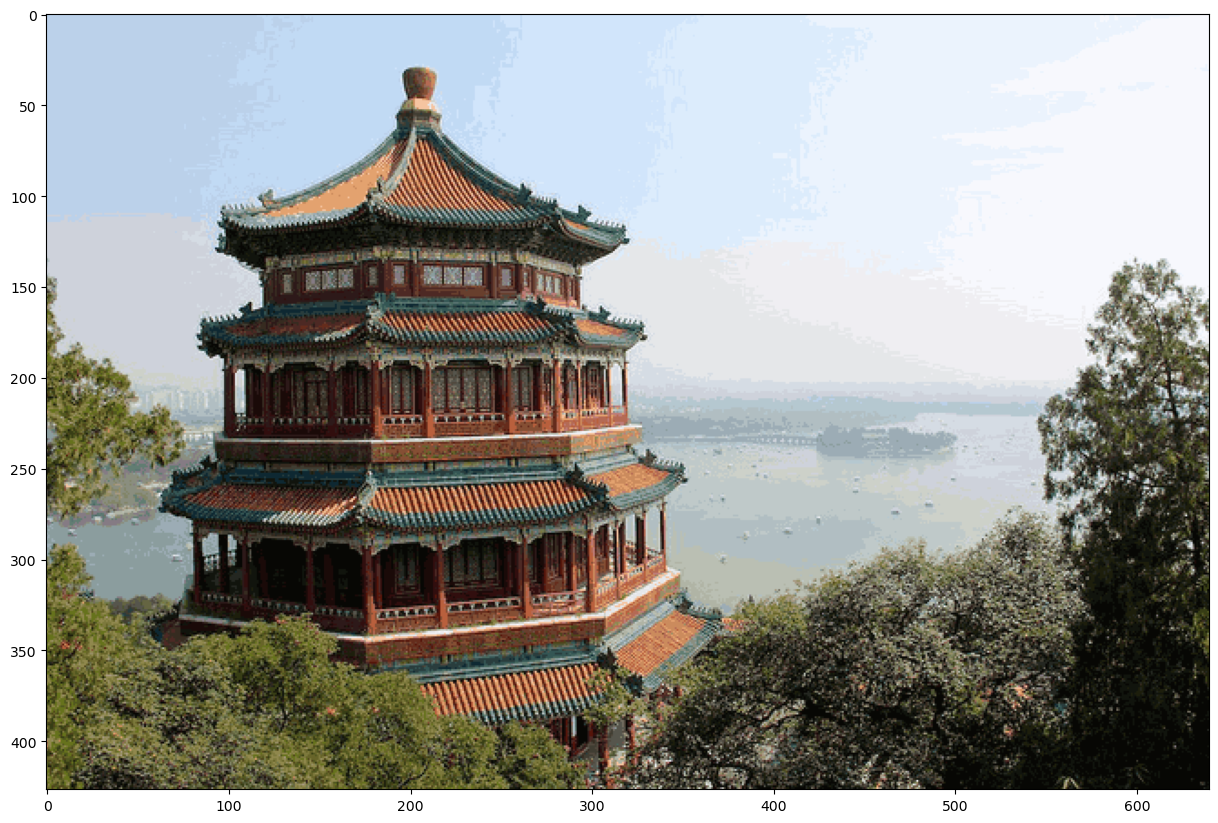

In [24]:
# 恢复图片的结构
image_kmeans = image_kmeans.reshape(w, h, d)
plt.figure(figsize=(15, 15))
plt.imshow(image_kmeans)

### 随机进行的矢量量化

In [27]:
codebook_random = shuffle(image_array, random_state=0)[0:n_clusters]
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis = 0)
labels_random.shape
# pairwise_distances_argmin(x1, x2, axis)
# 用于计算x2中每个样本到x1中每个样本点的距离，并返回和x2相同形状的，x1中对应的最近的样本点的索引


(273280,)

In [28]:
# 使用随机质心来替换所有样本
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = codebook_random[labels_random[i]]

In [29]:
pd.DataFrame(image_random).drop_duplicates().shape

(64, 3)

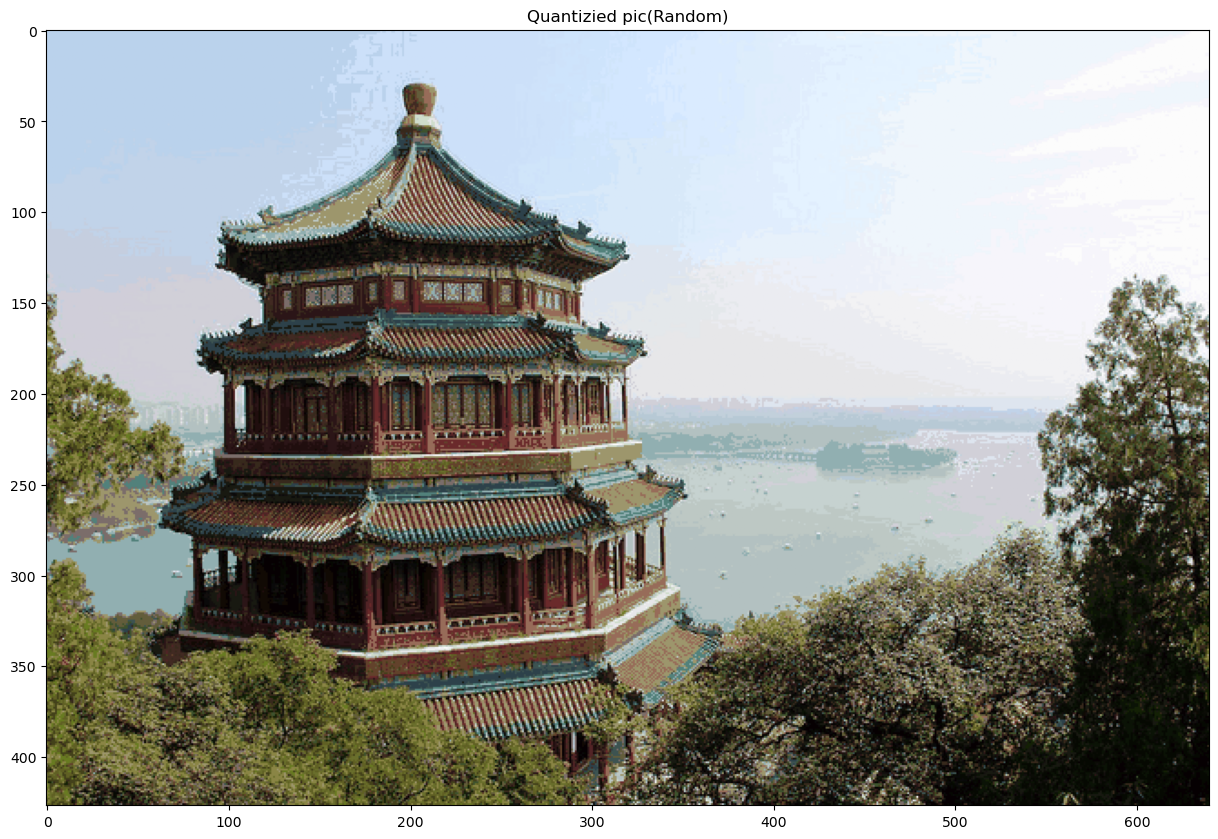

In [37]:
image_random = image_random.reshape(w, h, d)
plt.figure(figsize=(15, 15))
plt.title('Quantizied pic(Random)')
plt.imshow(image_random)

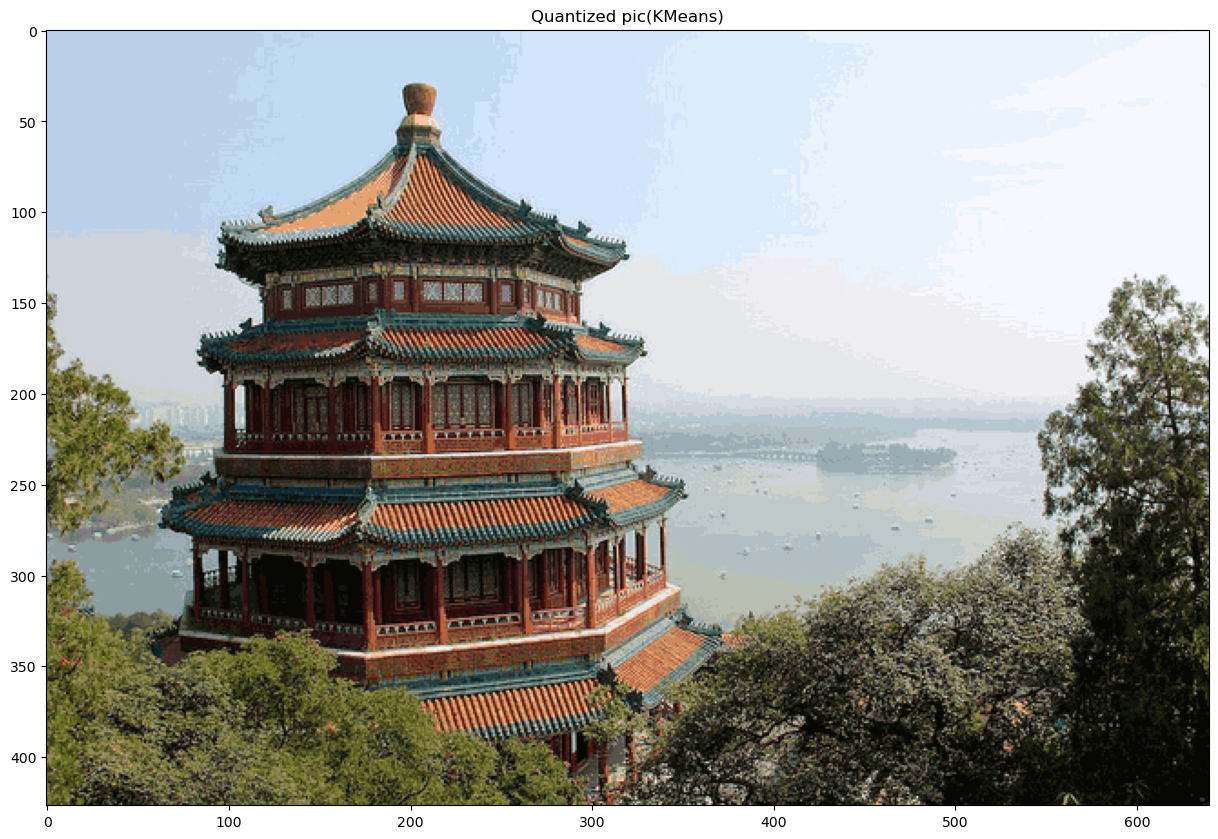

In [34]:
plt.figure(figsize=(15, 15))
plt.title('Quantized pic(KMeans)')
plt.imshow(image_kmeans)

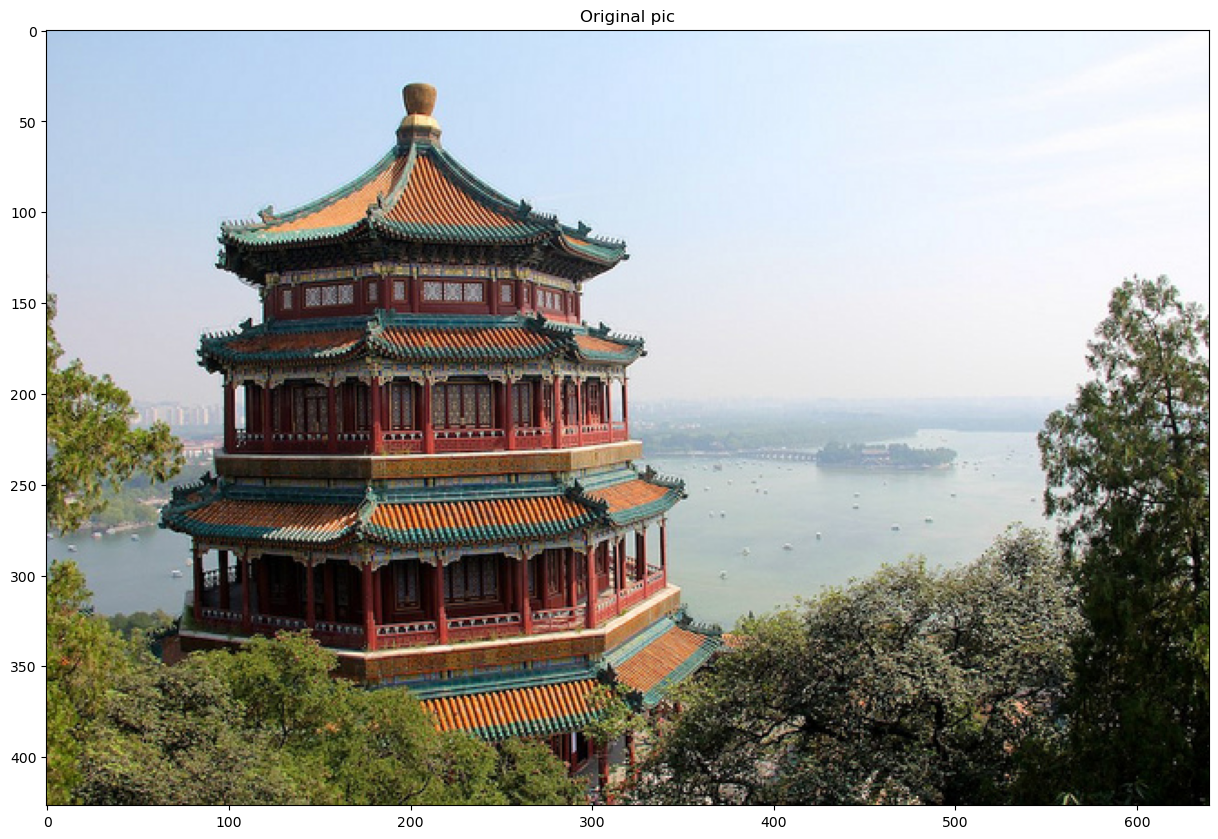

In [36]:
plt.figure(figsize=(15, 15))
plt.title('Original pic')
plt.imshow(china)